In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import copy
sns.set_style('white')
palette = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
sns.set(palette = palette, font_scale=1.5, style="white", rc={"lines.linewidth": 1.0})

In [2]:
df = pd.read_pickle("exact_uci_df.pkl")

In [3]:
def PlotAx(ax, dset, m=0.9):
    sub_df = df[df['Dataset']==dset]
    box = sns.boxplot(x='N', y='RMSE', hue='Type', data=sub_df[sub_df['m'].isin(['NA', m])],
               ax=ax, showfliers = False)
    for patch in box.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .75))
    sns.despine()
    ax.set_title(dset.capitalize(), fontsize=fs-2)
    if dset == 'winewhite':
        ax.set_title("Wine, White", fontsize=fs-2)
    elif dset == "winered":
        ax.set_title("Wine, Red", fontsize=fs-2)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend([],[], frameon=False)
    return box

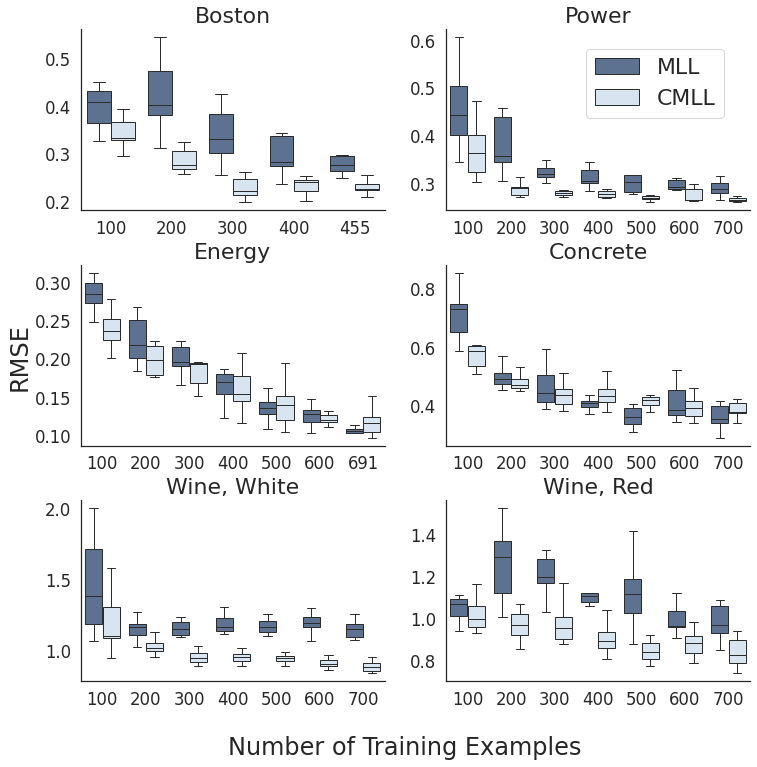

In [4]:
fig, ax = plt.subplots(3,2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)


fs = 24

PlotAx(ax[0,0], 'boston')
PlotAx(ax[0,1], 'power')
PlotAx(ax[1,0], 'energy')
PlotAx(ax[2,0], 'winewhite')
PlotAx(ax[2,1], 'winered')
box = PlotAx(ax[1,1], 'concrete')

plt.legend([box.artists[0], box.artists[1]], ['MLL', "CMLL"],
          fontsize=fs-2, bbox_to_anchor=(0.95, 3.55))
fig.text(0.5, 0.04, 'Number of Training Examples', ha='center', fontsize=fs)
fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=fs);
# plt.savefig("./exactdkl.pdf", bbox_inches='tight')

## M plotter

In [5]:
sns.set_style('white')
# style.use('whitegrid')
palette = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
sns.set(palette = palette, font_scale=2.0, style="white", rc={"lines.linewidth": 2.0})

In [6]:
keep_dats = ['boston', 'power', 'energy', 'concrete', 'winewhite', 'winered']
temp_df = df[(df['Type']=='cmll') & (df['N']==300) & (df['Dataset'].isin(keep_dats))]

In [7]:
# temp_df['normRMSE'] = 0.
temp_df.insert(0, "norm_RMSE", temp_df[['Dataset', 'RMSE']].groupby('Dataset').transform(lambda x: (x - x.mean()) / x.std()).copy())
mean_df = temp_df[['Dataset', 'norm_RMSE', 'm']].groupby(['Dataset', 'm']).mean()

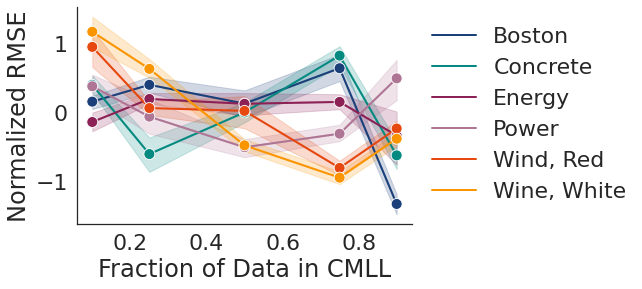

In [8]:
from matplotlib.lines import Line2D
pal = [palette[0], palette[2], palette[4], palette[5], palette[6], palette[7]]
sns.lineplot(x='m', y='norm_RMSE', hue="Dataset", data=temp_df, ci=50, palette=pal, alpha=0.25)
sns.lineplot(x='m', y='norm_RMSE', hue="Dataset", data=temp_df, ci=None, palette=pal, alpha=1., legend=False)
sns.scatterplot(x='m', y="norm_RMSE", hue='Dataset', data=mean_df, s=120, legend=False, zorder=4,
                   palette=pal, alpha=1.)

custom_lines = [Line2D([0], [0], color=palette[0], lw=2),
                Line2D([0], [0], color=palette[2], lw=2),
                Line2D([0], [0], color=palette[4], lw=2),
               Line2D([0], [0], color=palette[5], lw=2),
                Line2D([0], [0], color=palette[6], lw=2),
                Line2D([0], [0], color=palette[7], lw=2)]
                
plt.ylabel("Normalized RMSE")
plt.xlabel("Fraction of Data in CMLL")
plt.legend(custom_lines, ['Boston', "Concrete", "Energy", "Power",
            "Wind, Red", "Wine, White"], bbox_to_anchor=(1., 1.), frameon=False)
# plt.savefig("./m-effect.pdf", bbox_inches='tight')
sns.despine()

## NLL

In [9]:
nll_df = pd.read_pickle("exact_nll_df.pkl")

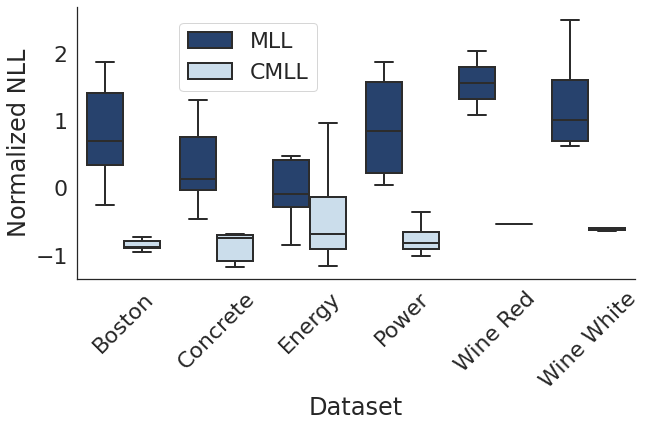

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(x='Dataset', y='norm_NLL', hue='Type', data=nll_df, showfliers=False)
ax.set_xticklabels(["Boston", "Concrete", "Energy", "Power", "Wine Red", "Wine White"], rotation=45)
ax.set_ylabel("Normalized NLL")
sns.despine()

ax.legend([box.artists[0], box.artists[1]], ['MLL', "CMLL"],
          fontsize=fs-2, bbox_to_anchor=(0.45, 0.65))

plt.savefig("./dkl-nlls.pdf", bbox_inches='tight')